There are currently two ways to invoke the calculation of the formal integral with tardis. The first is for the use in interactive shells and scripts and the second one for running tardis with the command line script `tardis`.

Let's start with some common imports:

In [1]:
%pylab notebook
import tardis
from tardis.io.config_reader import Configuration
from tardis.simulation import Simulation
config_fname = tardis.__path__[0] + '/../../data/tardis_example/tardis_example_integral.yml'

/home/stefan/anaconda2/envs/tardis/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


We run tardis in an interactive shell the usual way. Afterwards, we can call `simulation.runner.integrator.calculate_spectrum(frequency)` to create an integrated spectrum for any list of frequencies.

In [2]:
simulation = tardis.run_tardis(config_fname);

[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from /media/data/projects/tardis/tardis-code/tardis/../../data/tardis_example/kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:72)
tardis.plasma.standard_plasmas - INFO - Reading Atomic Data from /media/data/projects/tardis/tardis-code/tardis/../../data/tardis_example/kurucz_cd23_chianti_H_He.h5
tardis.atomic - INFO - Read Atom Data with UUID=5ca3035ca8b311e3bb684437e69d75d7 and MD5=21095dd25faa1683f4c90c911a00c3f8
[tardis.plasma.base  ][DEBUG  ]  Updating modules in the following order: (base.py:195)
tardis.plasma.base - DEBUG - Updating modules in the following order:
[tardis.montecarlo.base][DEBUG  ]  Electron scattering switched on (base.py:411)
tardis.montecarlo.base - DEBUG - Electron scattering switched on
[tardis.simulation.base][INFO   ]  Starting iteration 1/1 (base.py:194)
tardis.simulation.base - INFO - Starting iteration 1/1
[tardis.simulation.base][INFO   ]  Luminosity emitted = 8.03041e+42 erg / s Luminosity 

For simplicity we use the list of frequencies defined by the configuration. We could use any other list that is a astropy Quantity which can be transformed into a frequency (e.g. a list of wavelengths in angstrom works, too).

The integration returns a `TARDISSpectrum` instance holding variables like the luminosity_density in nu and lambda.

In [3]:
wl = simulation.runner.spectrum.frequency
spectrum = simulation.runner.integrator.calculate_spectrum(wl)

Here is a simple plot of the integrated spectrum (blue) in comparison with the virtual spectrum (green).

<IPython.core.display.Javascript object>


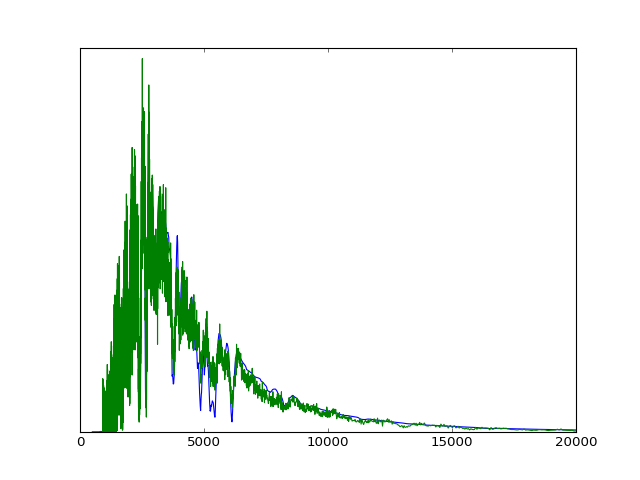

In [4]:
fig = figure()
ax = plt.gca()
spectrum.plot(ax)
simulation.runner.spectrum_virtual.plot(ax)
fig.show()

When running the command line script, we can control the type of spectrum that is written to txt with the `method` option of the `spectrum` setting in the YAML. If omitted, the default value is 'virtual', however it can be set to 'real' for the spectrum of the real packets, or to 'integrated' for a spectrum from the formal integral approach.

Here we verify our method for the spectral generation is 'integrated'.

In [5]:
config = Configuration.from_yaml(config_fname)
config['spectrum']

{'method': 'integrated',
 'num': 10000,
 'start': <Quantity 500.0 Angstrom>,
 'stop': <Quantity 20000.0 Angstrom>}

Afterwards we run the tardis script in the shell and save the spectrum to /tmp/tardis_spec.txt

In [6]:
!tardis $config_fname /tmp/tardis_spec.txt

[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from /media/data/projects/tardis/tardis-code/tardis/../../data/tardis_example/kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:72)
tardis.plasma.standard_plasmas - INFO - Reading Atomic Data from /media/data/projects/tardis/tardis-code/tardis/../../data/tardis_example/kurucz_cd23_chianti_H_He.h5
tardis.atomic - INFO - Read Atom Data with UUID=5ca3035ca8b311e3bb684437e69d75d7 and MD5=21095dd25faa1683f4c90c911a00c3f8
[tardis.plasma.base  ][DEBUG  ]  Updating modules in the following order: (base.py:195)
tardis.plasma.base - DEBUG - Updating modules in the following order:
[tardis.montecarlo.base][DEBUG  ]  Electron scattering switched on (base.py:411)
tardis.montecarlo.base - DEBUG - Electron scattering switched on
[tardis.simulation.base][INFO   ]  Starting iteration 1/1 (base.py:194)
tardis.simulation.base - INFO - Starting iteration 1/1
Running with OpenMP - 4 threads
	[100%] Packets(finished/total): 10000/10000
[tardis.si

Finally we plot the result and verify, that this looks indeed how a integrated spectrum should look like (no spread due to noise). As the run was done with only 10 000 packets, one would expect significant visible noise.

<IPython.core.display.Javascript object>


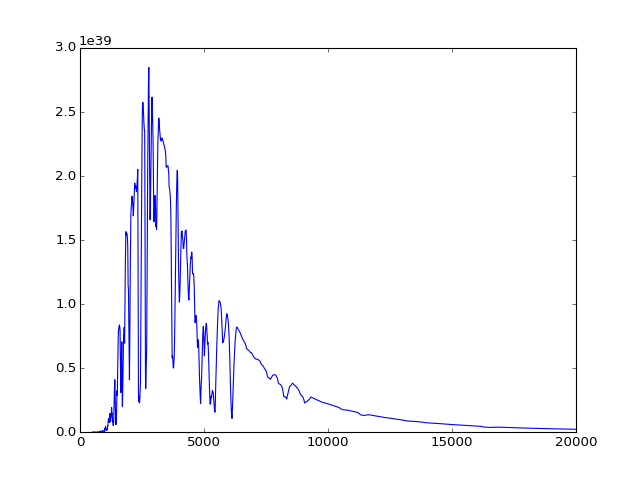

In [7]:
wl, lum = np.loadtxt('/tmp/tardis_spec.txt', unpack=True);
figure()
plot(wl, lum);